# CodeAlpha Credit Scoring Model 
### Task 1: Develop a credit scoring model to predict the creditworthiness of individuals based on historical financial data. Utilize classification algorithms and assess the model's accuracy.

Dataset: https://www.kaggle.com/datasets/islombekdavronov/creditscoring-data?resource=download

## Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Retrival

In [7]:
# Load data
train_data = pd.read_csv("C:\\Users\\rishi\\Downloads\\data_train.csv")
test_data = pd.read_csv("C:\\Users\\rishi\\Downloads\\data_test.csv")

In [8]:
# Assuming 'label' is the target variable
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']

In [9]:
X_test = test_data.drop(columns=['label'])
y_test = test_data['label']

## DFS Process

In [10]:
train_data.head()


,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,34,1,2,6,2,13,12,1,12,1,0,0.0,0,0,0,-,1
1,0,38,1,1,5,1,10,7,1,13,1,2,0.0,0,0,0,-,1
2,0,35,1,2,4,2,9,8,1,13,4,1,1.0,1,0,0,-,1
3,0,27,1,1,5,2,13,7,1,12,1,2,1.0,0,0,0,-,1
4,0,32,1,2,4,2,10,7,1,13,3,1,2.0,1,0,0,-,1


In [11]:
test_data.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,40,1,2,4,1,0,3,1,12,2,1,2.4,1,0,0,-,1
1,0,36,2,2,4,1,0,5,1,13,1,2,0.0,1,0,0,-,1
2,0,31,1,2,4,1,0,7,1,13,1,1,0.3,0,0,0,-,2
3,0,29,1,2,4,1,0,1,1,13,1,1,0.9,1,0,0,-,1
4,0,38,1,2,4,1,0,10,1,13,1,2,4.3,0,4,2,318,1


## Check for Null Values

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   label                 8707 non-null   int64  
 1   Age                   8707 non-null   int64  
 2   Language              8707 non-null   int64  
 3   Sex                   8707 non-null   int64  
 4   Marital               8707 non-null   int64  
 5   Has_Credit            8707 non-null   int64  
 6   Field                 8707 non-null   int64  
 7   Month_of_birth        8707 non-null   int64  
 8   Day_of_birth          8707 non-null   int64  
 9   Region                8707 non-null   int64  
 10  Number_of_credits     8707 non-null   int64  
 11  Linked_cards          8707 non-null   int64  
 12  INPS_mln_sum          8707 non-null   float64
 13  INPS_yes_no           8707 non-null   int64  
 14  Score_level           8707 non-null   int64  
 15  Score_class          

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   label                 48 non-null     int64  
 1   Age                   48 non-null     int64  
 2   Language              48 non-null     int64  
 3   Sex                   48 non-null     int64  
 4   Marital               48 non-null     int64  
 5   Has_Credit            48 non-null     int64  
 6   Field                 48 non-null     int64  
 7   Month_of_birth        48 non-null     int64  
 8   Day_of_birth          48 non-null     int64  
 9   Region                48 non-null     int64  
 10  Number_of_credits     48 non-null     int64  
 11  Linked_cards          48 non-null     int64  
 12  INPS_mln_sum          48 non-null     float64
 13  INPS_yes_no           48 non-null     int64  
 14  Score_level           48 non-null     int64  
 15  Score_class           48 

## Check for Null Values

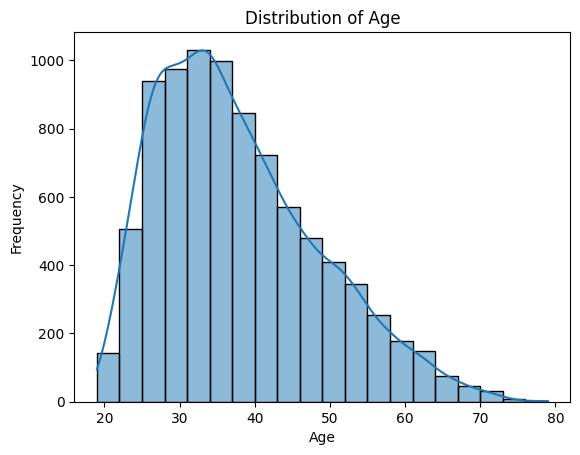

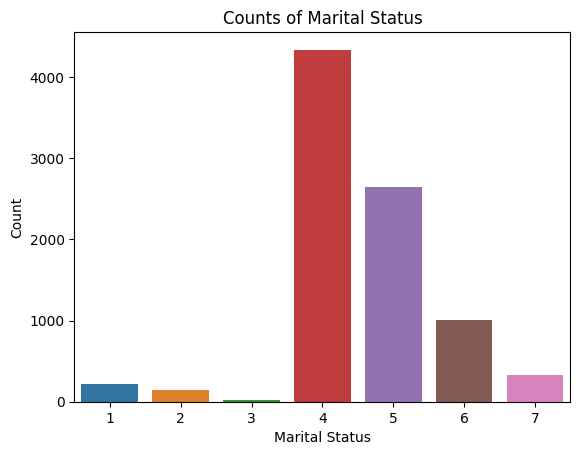

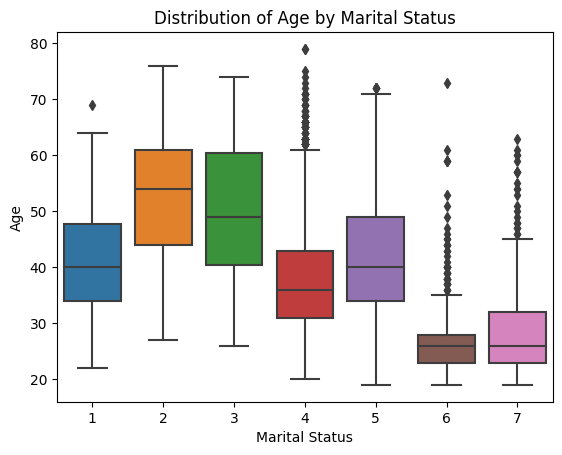

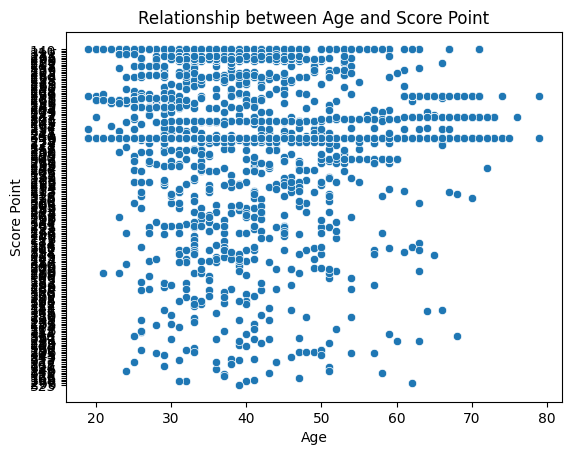

C:\Users\rishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


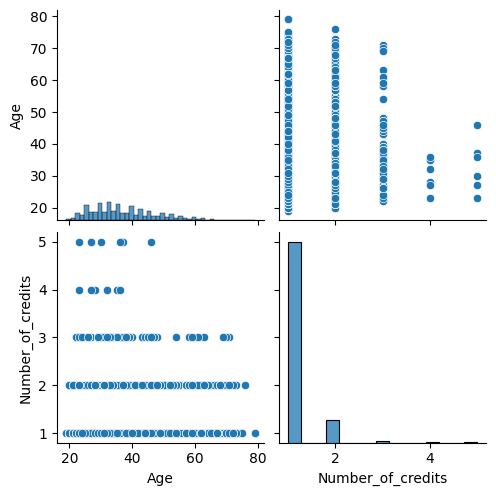

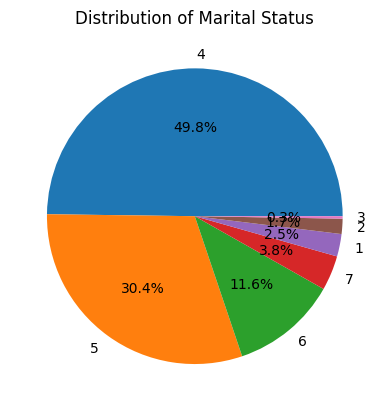

In [15]:

# Histograms for numerical features
sns.histplot(data=train_data, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar chart for categorical variable
sns.countplot(data=train_data, x='Marital')
plt.title('Counts of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Box plot to visualize numerical data distribution across categories
sns.boxplot(data=train_data, x='Marital', y='Age')
plt.title('Distribution of Age by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

# Scatter plot to visualize the relationship between two numerical variables
sns.scatterplot(data=train_data, x='Age', y='Score_point')
plt.title('Relationship between Age and Score Point')
plt.xlabel('Age')
plt.ylabel('Score Point')
plt.show()

# Pair plot for pairwise relationships between numerical variables
sns.pairplot(data=train_data[['Age', 'Number_of_credits', 'Score_point']])
plt.show()

# Pie chart for a categorical variable
marital_counts = train_data['Marital'].value_counts()
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Marital Status')
plt.show()



## Normalization

In [16]:

# Replace '-' with NaN (missing value)
X_train.replace('-', np.nan, inplace=True)
X_test.replace('-', np.nan, inplace=True)

# Convert all columns to numeric (assuming they are numerical features)
X_train = X_train.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)

# Impute missing values (replace NaN with mean or median)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model training

In [19]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

In [21]:
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Classification Report

In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



## Confusion matrix

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[26  0]
 [ 0 22]]


# Thank You!!